<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Ranosz_testowy/pum_14_05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import csv
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# zaladowanie danych
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ratings.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# liczba wszystkich ocen
# print(ratings.count())
print("liczba wszystkich ocen: " + str(len(ratings)))

liczba wszystkich ocen: 100836


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# liczba wszystkich filmow
print("liczba wszystkich filmow: " + str(len(movies)))

liczba wszystkich filmow: 9742


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# liczba unikalnych uzytkownikow
print(ratings['userId'].nunique())

610


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Średnią liczbę ocen na użytkownika
print(ratings.shape[0]/ratings['userId'].nunique())
print(len(ratings)/ratings['userId'].nunique())

165.30491803278687
165.30491803278687


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Średnią liczbę ocen na film - biorac pod uwage nieocenione filmy i nie
print(ratings.shape[0]/movies.shape[0])
print(ratings.shape[0]/ratings['movieId'].nunique())
# print(len(ratings)/len(movies))

10.350646684459043
10.369806663924312


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-20054c93104d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="rating", data=ratings, palette="mako")


Text(0.5, 1.0, 'Rozklad ocen filmow')

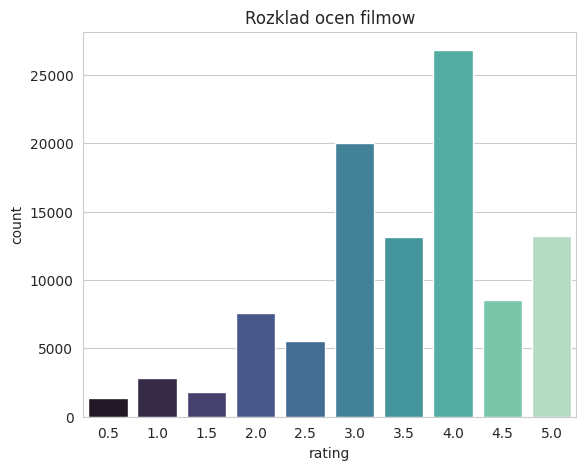

In [ ]:
# Rozkład ocen
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="rating", data=ratings, palette="mako")
plt.title("Rozklad ocen filmow")

In [ ]:
# przypisanie do zmiennej movie_titles słownika klucz wartosc movieID - title
movie_titles = dict(zip(movies['movieId'], movies['title']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# grupujemy ratings po movieId i agregujemy kolumny count i mean?
movie_stats = ratings.groupby('movieId')[['rating']].agg(['count', 'mean'])
# Usuwanie kolumn z movieStats? If resulting index has only 1 level left, the result will be of Index type, not MultiIndex. The original index is not modified inplace.
movie_stats.columns = movie_stats.columns.droplevel()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# obliczanie bayesian average
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()
def bayesian_avg(ratings):
  bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
  return bayesian_avg
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# sortowanie po bayesian average
movie_stats = movie_stats.merge(movies[['movieId', 'title']])
movie_stats.sort_values('bayesian_avg', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movieId,count,mean,bayesian_avg,title
277,318,317,4.429022,4.392070,"Shawshank Redemption, The (1994)"
659,858,192,4.289062,4.236457,"Godfather, The (1972)"
2224,2959,218,4.272936,4.227052,Fight Club (1999)
224,260,251,4.231076,4.192646,Star Wars: Episode IV - A New Hope (1977)
46,50,204,4.237745,4.190567,"Usual Suspects, The (1995)"


In [ ]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Argumenty:
    df: dataframe pandas

    Zwraca:
        X: sparse matrix
        user_mapper: słownik mapujący id użytkowników na indeksy użytkowników
        user_inv_mapper: słownik mapujący indeksy użytkowników na id użytkowników
        movie_mapper: słownik mapujący id filmów na indeksy filmów
        movie_inv_mapper: słownik mapujący indeksy filmów na id filmów
    """

    N = df['userId'].nunique()
    M = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))

    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))

    user_index = [user_mapper[i] for i in df['userId']]
    movie_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sparsity = X.count_nonzero()/(X.shape[0]*X.shape[1])

print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.7%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# metoda k najblizszych sasiadow
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, k, metric='cosine', show_distance=False):
    """
    Argumenty:
    movie_id: id interesującego nas filmu
    X: macierz użytkownik-element (utility matrix)
    k: liczba podobnych filmów do znalezienia
    metric: metryka odległości do obliczeń kNN

    Zwraca:
        listę k podobnych id filmów
    """

    neighbour_ids = []

    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(movie_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [ ]:
# k najblizszych sasiadow - jesli ogladales movie_id = 1 (w tym wypadku toy story),
# to zarekomenduje ci najblizszych sasiadow tego filmu
movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 1

similar_ids = find_similar_movies(movie_id, X, k=12)
movie_title = movie_titles[movie_id]

print(f"Poniewaz ogladales {movie_title}")
for i in similar_ids:
    print(movie_titles[i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Poniewaz ogladales Toy Story (1995)
Toy Story 2 (1999)
Jurassic Park (1993)
Independence Day (a.k.a. ID4) (1996)
Star Wars: Episode IV - A New Hope (1977)
Forrest Gump (1994)
Lion King, The (1994)
Star Wars: Episode VI - Return of the Jedi (1983)
Mission: Impossible (1996)
Groundhog Day (1993)
Back to the Future (1985)
Shrek (2001)
Aladdin (1992)


In [ ]:
######################################################################################################
######################################################################################################
######################################################################################################
# Czesc z surprise z 21.05 #
######################################################################################################
# załadowanie biblioteki i kod przykładowy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install surprise
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise import Dataset
from surprise import Reader

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from surprise import Dataset, SVD
from surprise.model_selection import cross_validate


# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin("ml-100k")

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9354  0.9289  0.9366  0.9387  0.9408  0.9361  0.0040  
MAE (testset)     0.7389  0.7331  0.7383  0.7387  0.7389  0.7376  0.0023  
Fit time          2.19    2.78    3.00    3.63    5.33    3.38    1.08    
Test time         0.40    0.64    0.28    0.39    0.46    0.43    0.12    


{'test_rmse': array([0.93535534, 0.928895  , 0.93657315, 0.93870461, 0.94077752]),
 'test_mae': array([0.73892923, 0.7330751 , 0.73834816, 0.7386734 , 0.73889042]),
 'fit_time': (2.189703941345215,
  2.776120662689209,
  2.9982028007507324,
  3.6290283203125,
  5.330127716064453),
 'test_time': (0.39922547340393066,
  0.644627571105957,
  0.2807643413543701,
  0.38666439056396484,
  0.4597189426422119)}

In [ ]:
from surprise import accuracy, Dataset, SVD
from surprise.model_selection import train_test_split

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin("ml-100k")

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.9382


0.9382192600971785

In [ ]:
# Get minimum and maximum rating from the dataset
min_rating = ratings.rating.min()
max_rating = ratings.rating.max()

reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#################################################################################################################################
# ZADANIE Z SYSTEMEM REKOMENDACYJNYM Z SURPRISE#

Odpowiedz/ pokaż część danych: • Przegląd danych: 1.Podaj liczbę filmów dla dzieci 2.Pokaż rozkład ocen filmów z 1995 3.Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy najwyżej oceniane • Zbuduj system rekomendacyjny używając biblioteki SURPRISE • Użyj dwóch algorytmów SVD oraz kNN w wersji wylosowanej • Użyj optymalizacji parametrów metodą GRID search do wyboru liczby sąsiadów z wylosowanego przedziału • Użyj walidacji krzyżowej dla ostatecznego modelu • Porównaj oba algorytmy pod względem czasu uczenia oraz wylosowanych błędów

In [ ]:
# dokoncz jeszcze
# Odpowiedz/ pokaż część danych:
# • Przegląd danych:
# 1.Podaj liczbę filmów dla dzieci
# 2.Pokaż rozkład ocen filmów z 1995
# 3.Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy najwyżej oceniane
# • Zbuduj system rekomendacyjny używając biblioteki SURPRISE
# • Użyj dwóch algorytmów SVD oraz kNN w wersji wylosowanej
# • Użyj optymalizacji parametrów metodą GRID search do wyboru liczby sąsiadów z
# wylosowanego przedziału
# • Użyj walidacji krzyżowej dla ostatecznego modelu
# • Porównaj oba algorytmy pod względem czasu uczenia oraz wylosowanych błędów

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
from surprise import accuracy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 1. Podaj liczbę filmów dla dzieci
kids_movies = movies[movies['genres'].str.contains('Children')].shape[0]
print(f"Liczba filmów dla dzieci: {kids_movies}")

Liczba filmów dla dzieci: 664


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-54-98696a13a324>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings_1995, palette="viridis")


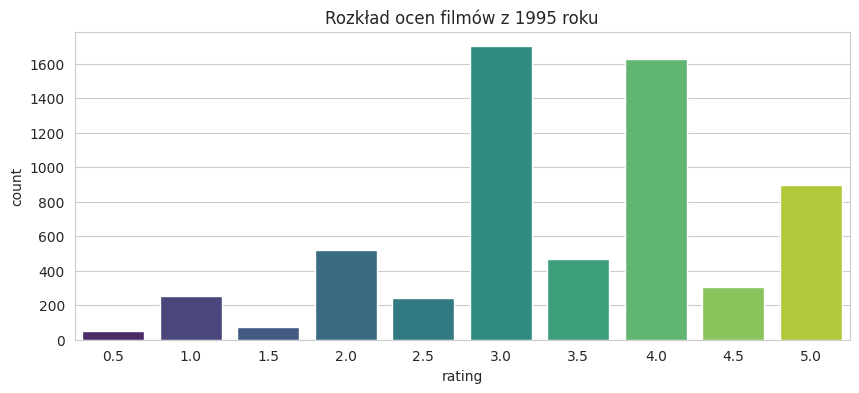

In [ ]:
# 2. Pokaż rozkład ocen filmów z 1995
ratings_1995 = ratings[ratings['movieId'].isin(movies[movies['title'].str.contains('1995')]['movieId'])]
plt.figure(figsize=(10, 4))
sns.countplot(x="rating", data=ratings_1995, palette="viridis")
plt.title("Rozkład ocen filmów z 1995 roku")
plt.show()

In [ ]:
# 3. Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy najwyżej oceniane
action_ratings = ratings[ratings['movieId'].isin(movies[movies['genres'].str.contains('Action')]['movieId'])]
average_action_rating = action_ratings['rating'].mean()
print(f"Średnia ocen filmów akcji: {average_action_rating:.2f}")

top_action_movies = action_ratings.groupby('movieId').agg({'rating': 'mean'}).reset_index()
top_action_movies = top_action_movies.merge(movies[['movieId', 'title']], on='movieId')
top_action_movies = top_action_movies.sort_values('rating', ascending=False).head(3)
print("3 najwyżej oceniane filmy akcji:")
print(top_action_movies[['title', 'rating']])


Średnia ocen filmów akcji: 3.45
3 najwyżej oceniane filmy akcji:
                                                  title  rating
1239             Love Exposure (Ai No Mukidashi) (2008)     5.0
1692                                 Tokyo Tribe (2014)     5.0
1593  Crippled Avengers (Can que) (Return of the 5 D...     5.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# System rekomendacyjny używając biblioteki SURPRISE
# Przygotowanie danych
min_rating = ratings.rating.min()
max_rating = ratings.rating.max()
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Użycie dwóch algorytmów: SVD oraz kNN
# SVD
algo_svd = SVD()
results_svd = cross_validate(algo_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# kNN
param_grid_knn = {
    'k': [10, 20, 30],
    'sim_options': {
        'name': ['cosine', 'pearson'],
        'user_based': [False]
    }
}
gs_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['rmse', 'mae'], cv=3, n_jobs=-1)
gs_knn.fit(data)

best_knn = gs_knn.best_estimator['rmse']
results_knn = cross_validate(best_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Walidacja krzyżowa dla ostatecznego modelu
print("Najlepsze parametry dla kNN:", gs_knn.best_params['rmse'])


best_knn = gs_knn.best_estimator['rmse']
results_knn = cross_validate(best_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Walidacja krzyżowa dla ostatecznego modelu
print("Najlepsze parametry dla kNN:", gs_knn.best_params['rmse'])

# Porównanie obu algorytmów pod względem czasu uczenia oraz wylosowanych błędów
print("SVD Results:")
print(results_svd)
print("kNN Results:")
print(results_knn)

# Wykonanie predykcji na zestawie testowym dla najlepszych modeli
trainset, testset = train_test_split(data, test_size=0.25)

algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)
rmse_svd = accuracy.rmse(predictions_svd)

best_knn.fit(trainset)
predictions_knn = best_knn.test(testset)
rmse_knn = accuracy.rmse(predictions_knn)

print(f"RMSE dla SVD: {rmse_svd}")
print(f"RMSE dla kNN: {rmse_knn}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8698  0.8783  0.8737  0.8739  0.8753  0.8742  0.0027  
MAE (testset)     0.6693  0.6738  0.6702  0.6714  0.6712  0.6712  0.0015  
Fit time          3.56    3.05    2.12    1.60    1.68    2.40    0.78    
Test time         0.28    1.29    0.12    0.12    0.36    0.43    0.44    
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9757  0.9818  0.9737  0.9703  0.